<a href="https://colab.research.google.com/github/Alina1-10/NM/blob/main/%D0%9B_%D0%A0_6_%D0%93%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B0_%D0%90%D0%BB%D1%96%D0%BD%D0%B0_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Інтерполяційний багаточлен Лагранжа

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand

In [2]:
x=np.array([-3.,-2.,1.,3.], dtype=float)
y=np.array([-4.,19.,-8.,14.], dtype=float)
x1, x2, x3, x4 = -1.5, 0.5, 1.5, 2 # точки, в якій потрібно обчислити значення

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
        # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює  (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f1 = lagrange_interpolation(x, y, x1)
print("Значення функції у точці x_1 =", f1.round(4))

f2 = lagrange_interpolation(x, y, x2)
print("Значення функції у точці x_2 =", f2.round(4))

f3 = lagrange_interpolation(x, y, x3)
print("Значення функції у точці x_3 =", f3.round(4))

f4 = lagrange_interpolation(x, y, x4)
print("Значення функції у точці x_4 =", f4.round(4))


Значення функції у точці x_1 = 20.75
Значення функції у точці x_2 = -2.25
Значення функції у точці x_3 = -10.75
Значення функції у точці x_4 = -9.0


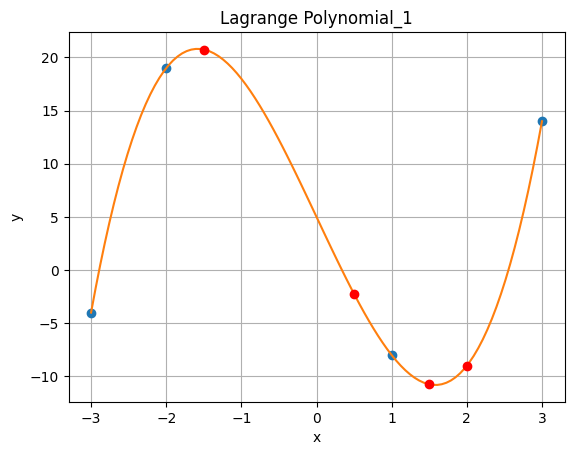

In [3]:
xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew) #будуємо графік функції Лагранжа

plt.plot(x1,f1,'ro')
plt.plot(x2,f2,'ro')
plt.plot(x3,f3,'ro')
plt.plot(x4,f4,'ro')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.show()

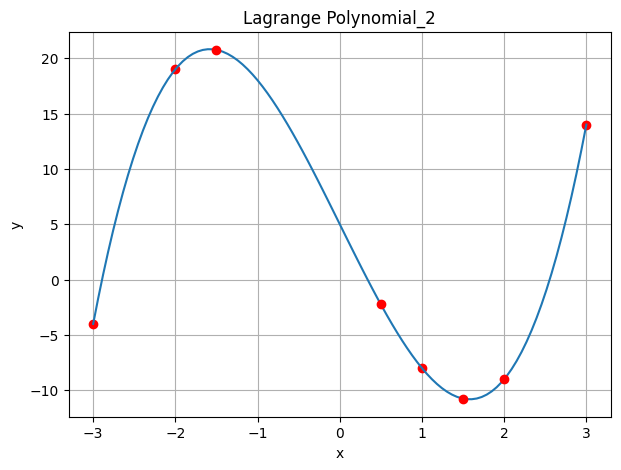

In [4]:
from scipy.interpolate import lagrange

#Перевірка
f = lagrange(x, y)
fig = plt.figure(figsize = (7,5))
plt.plot(x, y, 'ro', xnew, f(xnew))
plt.title('Lagrange Polynomial_2')

plt.plot(x1,f1,'ro')
plt.plot(x2,f2,'ro')
plt.plot(x3,f3,'ro')
plt.plot(x4,f4,'ro')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Приклад

In [8]:
from scipy.interpolate import lagrange

# Таблиця значень функції
x = [   -3,   -2,         1,       3]
f = [-4, 19, -8, 14]

d = len(x)

a = []
L = []
# Формуємо коефіцієнти та складові частини полінома
for j in range(d):
    p = 1
    s = ''
    for i in range(d):
        if i == j:
            continue
        else:
            p = p * (x[j] - x[i])
            s = s + '(x-' + str(x[i]) + ')'
    k = f[j]/p
    a.append(k)
    L.append(s)

# Формуємо поліном
polynom_string = 'L(x) = '
for i in range(d):
    polynom_string = polynom_string + str(a[i]) + '*' + L[i] + '+'
polynom_string = polynom_string[:-1].replace('+-', '-')

# Відображаємо поліном
print('Інтерполяційний поліном Лагранжа')
print(polynom_string)

Інтерполяційний поліном Лагранжа
L(x) = 0.16666666666666666*(x--2)(x-1)(x-3)+1.2666666666666666*(x--3)(x-1)(x-3)+0.3333333333333333*(x--3)(x--2)(x-3)+0.23333333333333334*(x--3)(x--2)(x-1)


   3             2
2 x + 3.331e-16 x - 15 x + 5


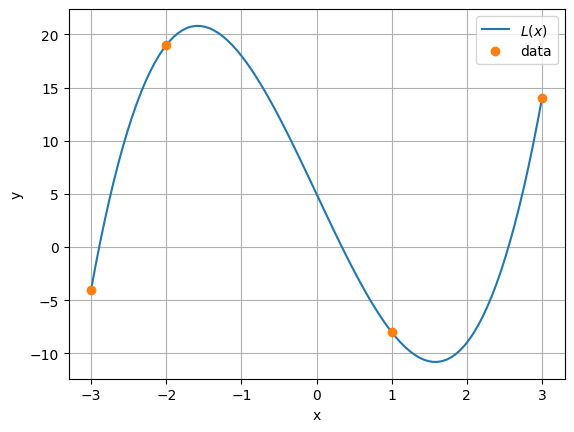

In [9]:

# Таблиця значень функції
x = np.array([     -3,   -2,         1,       3])
y = np.array([-4, 19, -8, 14])
# Інтерполяційний поліном Лагранжа
p =lagrange(x, y)
print(p)

# Формуємо точки для відображення полінома
z = np.linspace(np.min(x), np.max(x), 100)

# Відображаємо поліном та задані точки
plt.plot(z,p(z),'-')
plt.plot(x,y,'o')
plt.legend(['$L(x)$','data'])
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y'); plt.show()

Завдання 2.

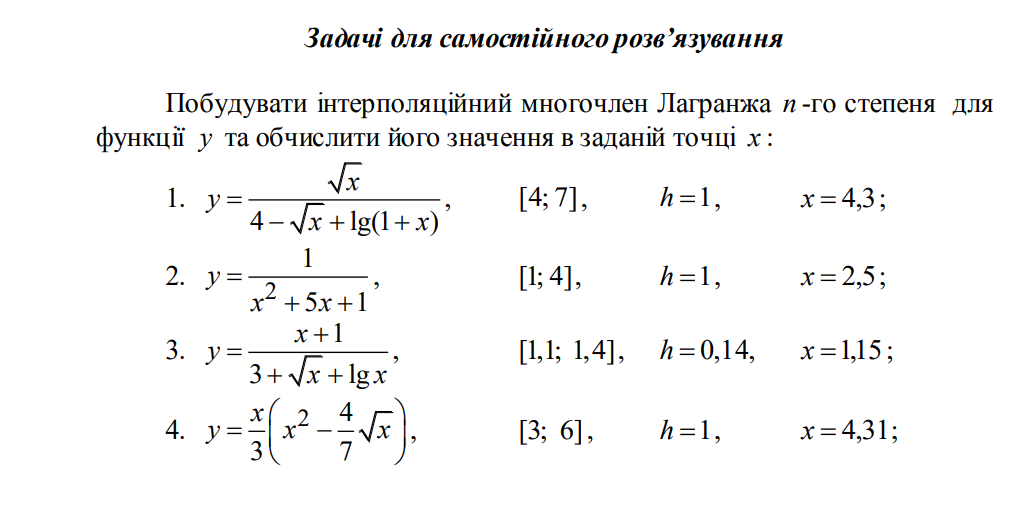

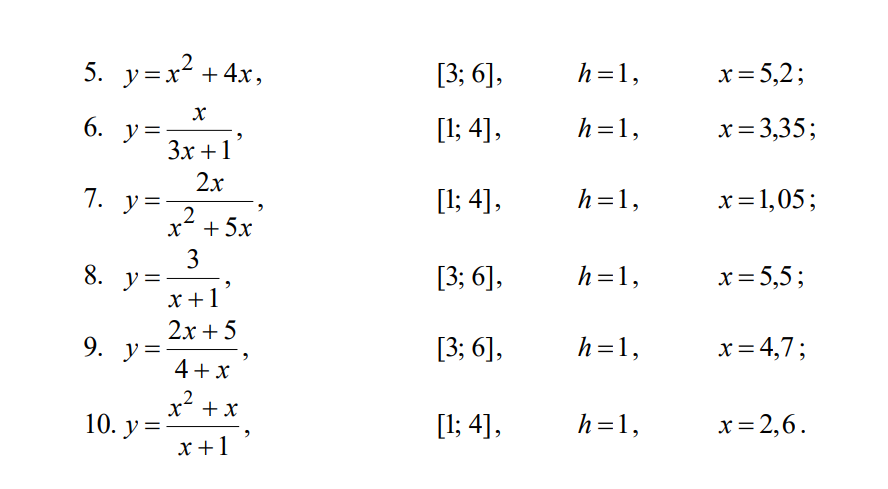

x = [1. 2. 3. 4.]
f_x(x) = [1.         1.8        2.8        3.82352941]
shapes: (4,) (4,)
Поліном Лагранжа p(x):
          3          2
-0.02941 x + 0.2765 x + 0.1765 x + 0.5765
Ступінь полінома: 3


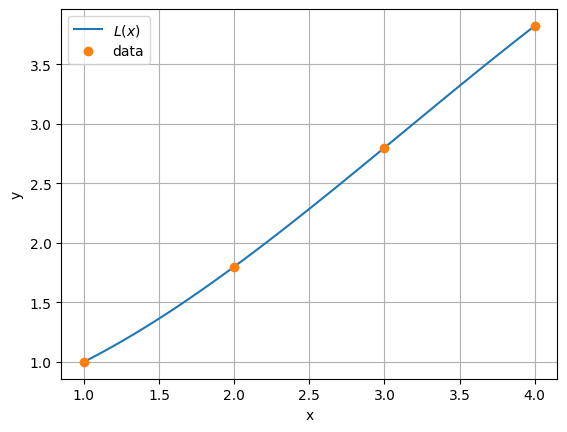

In [ ]:
x = np.array([1, 2, 3, 4], dtype=float)

def f_x(x):
    return (x**3 + 1) / (x**2 + 1)

# Обчислюємо значення функції у вузлах
y_data = f_x(x)

print('x =', x)
print('f_x(x) =', y_data)
print('shapes:', x.shape, y_data.shape)

# Інтерполяційний поліном Лагранжа
p = lagrange(x, y_data)
print('Поліном Лагранжа p(x):')
print(p)
print('Ступінь полінома:', p.order)

# Точки для графіка
z = np.linspace(np.min(x), np.max(x), 100)

# Графік
plt.plot(z, p(z), '-', label='$L(x)$')
plt.plot(x, y_data, 'o', label='data')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
x = np.array([1, 2, 3, 4], dtype=float)

def f_x(x):
    return (x**3 + 1) / (x**2 + 1)

# Значення функції у вузлах
y_data = f_x(x)

# Точка, у якій інтерполюємо
x_1 = 2.6

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    total = 0.0
    for i in range(n):
        l_i = 1.0
        for j in range(n):
            if i != j:
               l_i *= (x_test - x[j]) / (x[i] - x[j])
        total += y[i] * l_i
    return total

# Значення інтерполяційного полінома у x_1
f1 = lagrange_interpolation(x, y_data, x_1)
print("Значення інтерполяції у точці x_1 =", np.round(f1, 6))

Значення інтерполяції у точці x_1 = 2.387294
